# Notebook Import and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols,diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example-1 A simple cost function
### $f(x) = x^2 + x +1$

In [2]:
def f(x):
    return x**2+x+1

In [3]:
# Generate Data
x_1 = np.linspace(start = -3, stop = 3, num = 500 )

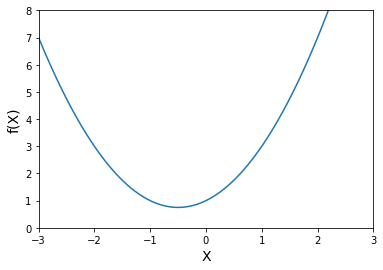

In [4]:
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1,f(x_1))
plt.show()

# Slope and Derivatives
### $df(x) = 2x+1$

In [5]:
def df(x):
    return 2*x+1

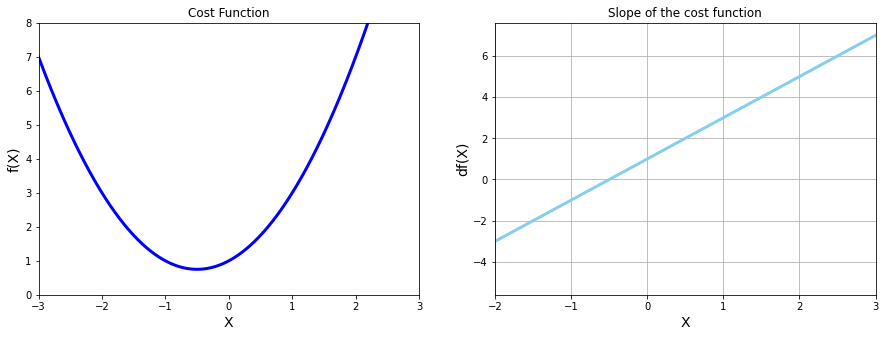

In [6]:
# Plot function and derivative side by side

# 1 Chart: Cost Function

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

plt.title('Cost Function')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 3)

# 2 Chart: Slope of the cost function

plt.subplot(1,2,2)

plt.grid()
plt.title('Slope of the cost function')
plt.xlim(-2,3)
#plt.ylim(0,8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.plot(x_1,df(x_1), color = 'skyblue', linewidth = 3)
plt.show()

# Gradient Descent

In [7]:
new_x = 3
previous_x = 0
multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - gradient * multiplier
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    steps = abs(new_x - previous_x)
    
    if steps < precision:
        print('Loop run this many times',n)
        break
    
print('Local Minimum occurs at', new_x)
print('Slope at this point ', df(new_x))
print('f(x)value or cost function value at this point', f(new_x))


Loop run this many times 40
Local Minimum occurs at -0.49962781616118024
Slope at this point  0.0007443676776395236
f(x)value or cost function value at this point 0.7500001385208099


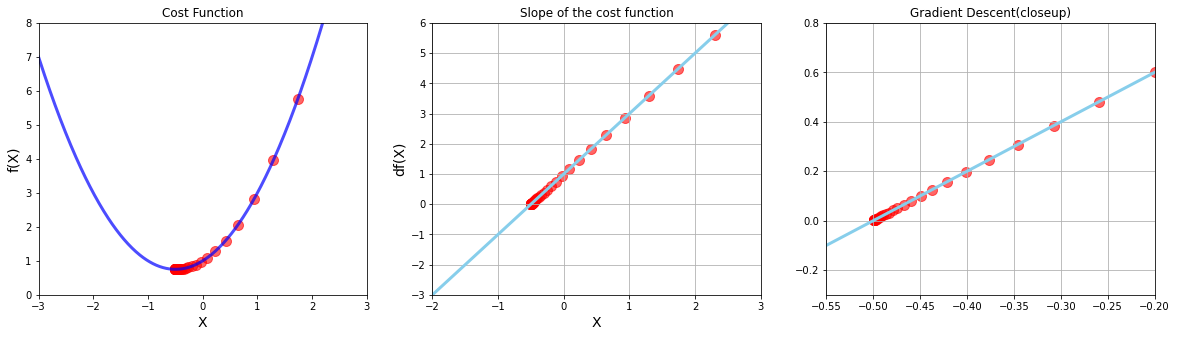

In [8]:
# Superimpose the gradient descent calculations on plot 

# 1 Chart: Cost Function

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)

plt.title('Cost Function')
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1,f(x_1), color = 'blue', linewidth = 3, alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list,f(values), color = 'red', s=100, alpha=0.6)

# 2 Chart: Slope of the cost function

plt.subplot(1,3,2)

plt.grid()
plt.title('Slope of the cost function')
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.plot(x_1,df(x_1), color = 'skyblue', linewidth = 3)

plt.scatter(x_list,slope_list, color='red',s=100, alpha=0.6)

# 3 Chart: Gradient descent closeup

plt.subplot(1,3,3)

plt.grid()
plt.title('Gradient Descent(closeup)')
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.plot(x_1,df(x_1), color = 'skyblue', linewidth = 3)

plt.scatter(x_list,slope_list, color='red',s=100, alpha=0.6)

plt.show()

# Multiple Minima vs Initial Guess & Advanced Functions
### $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

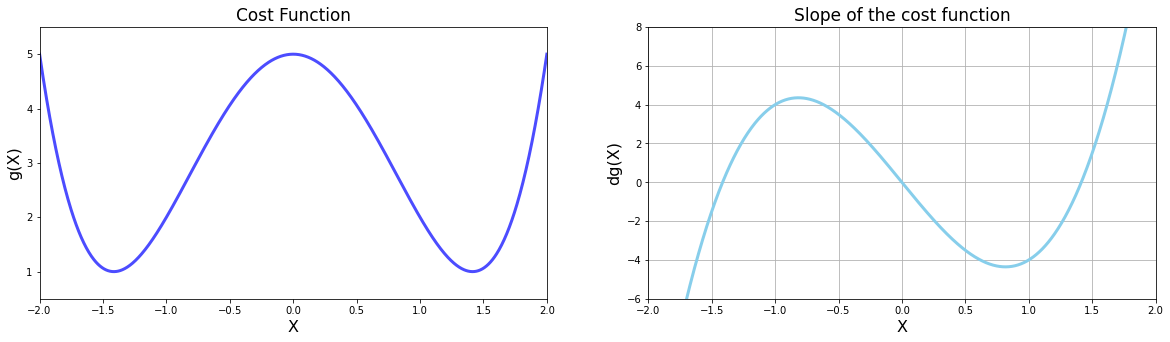

In [10]:
# Plot function and derivative side by side 

# 1 Chart: Cost Function

plt.figure(figsize = (20,5))

plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function', fontsize =17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3, alpha=0.7)


# 2 Chart: Slope of the cost function

plt.subplot(1,2,2)

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(X)', fontsize = 16)
plt.plot(x_2,dg(x_2), color = 'skyblue', linewidth = 3)


plt.show()

## Gradient Descent as a Python Function

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, max_iter = 300):
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func((previous_x))
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func((new_x)))

        steps = abs(new_x - previous_x)

        if steps < precision:
            break
    return new_x, x_list, slope_list
 

In [12]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


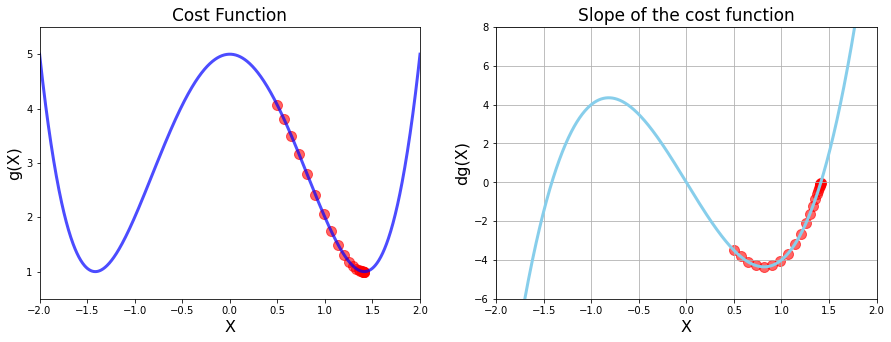

In [15]:
# Calling Gradient descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.5)

# Plot function and derivative side by side 

# 1 Chart: Cost Function

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost Function', fontsize =17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(X)', fontsize = 16)
plt.plot(x_2,g(x_2), color = 'blue', linewidth = 3, alpha=0.7)

values = np.array(list_x)
plt.scatter(list_x,g(values), color = 'red', s = 100, alpha = 0.6)


# 2 Chart: Slope of the cost function

plt.subplot(1,2,2)

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(X)', fontsize = 16)

plt.plot(x_2,dg(x_2), color = 'skyblue', linewidth = 3)
plt.scatter(list_x,deriv_list, color = 'red', s = 100, alpha = 0.6)

plt.show()

# Learning Rate

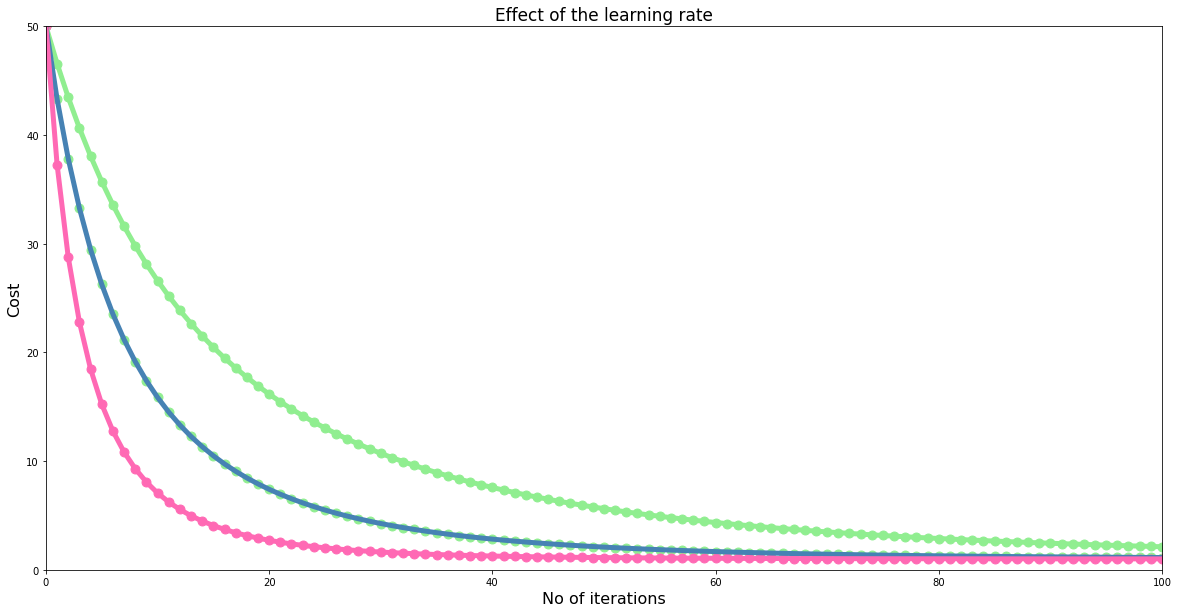

In [16]:
# Running gradient descent 3 times for low, mid and high learning value respectively saving function in Tuple

n=100

low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Plotting reduction in each cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our chart 
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting low learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='lightgreen', s=80)

# Plotting low learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

plt.show()

# Example 3- Data Visualization with 3D charts
### Minimise
### $$f(x,y) = \frac {1}{3^ {-x^2 - y^2} + 1}$$
Minimise $$f(x,y) = \frac {1}{r+1}$$ where r is $3^ {-x^2 - y^2}$

In [17]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [18]:
x_3 = np.linspace(start = -2, stop = 2, num = 200)
y_3 = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of the array: ', x_3.shape)
x_3,y_3 = np.meshgrid(x_3,y_3)
print('Shape of the array after meshgrid: ', x_3.shape)

Shape of the array:  (200,)
Shape of the array after meshgrid:  (200, 200)


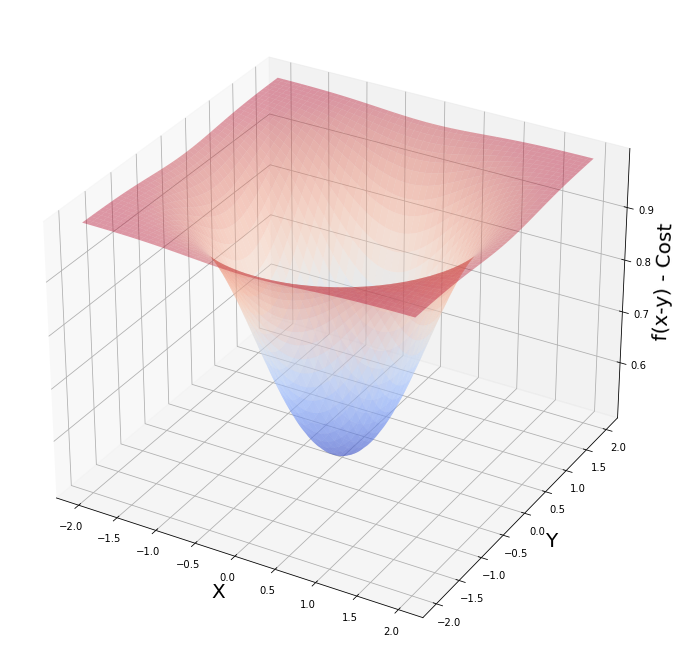

In [19]:
# Generating 3D Plot
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x-y) - Cost', fontsize=20)

ax.plot_surface(x_3,y_3,f(x_3,y_3),cmap = cm.coolwarm, alpha=0.4)
plt.show()

# Partial Derivatives & Symbolic Computations
## $$\frac{\partial f}{\partial x} = \frac {2x\ln(3)\cdot 3^{-x^2 - y^2}}{\left (3^{-x^2 - y^2} + 1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac {2y\ln(3)\cdot 3^{-x^2 - y^2}}{\left (3^{-x^2 - y^2} + 1\right)^2}$$

In [20]:
a,b = symbols('x, y')
print('Our Cost Function: ',f(a,b))
print('Partial derivative of cost function wrt x: ', diff(f(a,b),a))
print('Value of cost function at x = 1.8 & y = 1.0 is: ',f(a,b).evalf(subs={a:1.8,b:1.0}))
print('Value of partial derivative wrt x at x = 1.8 & y = 1.0 is: ',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our Cost Function:  1/(3**(-x**2 - y**2) + 1)
Partial derivative of cost function wrt x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of cost function at x = 1.8 & y = 1.0 is:  0.990604794032582
Value of partial derivative wrt x at x = 1.8 & y = 1.0 is:  0.0368089716197505


# Batch Gradient descent with Sympy

In [21]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1])

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of :  3.45838599885832e-11
Minimum occurs at y value of :  1.92132555492129e-11
The cost is:  0.500000000000000


In [22]:
# Partial Derivatives without sympy example

def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2
def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [23]:
fpx(1.8,1.0)

0.036808971619750504

In [24]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1])

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of :  3.458385998858304e-11
Minimum occurs at y value of :  1.9213255549212797e-11
The cost is:  0.5


# Graphing 3D Gradient Descent & Advance Numpy Arrays

In [25]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1])
values_array = np.array(params.reshape(1,2))
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis = 0)
    #values_array = np.concatenate(values_array, params.reshape(1,2), axis = 0)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of :  3.458385998858304e-11
Minimum occurs at y value of :  1.9213255549212797e-11
The cost is:  0.5


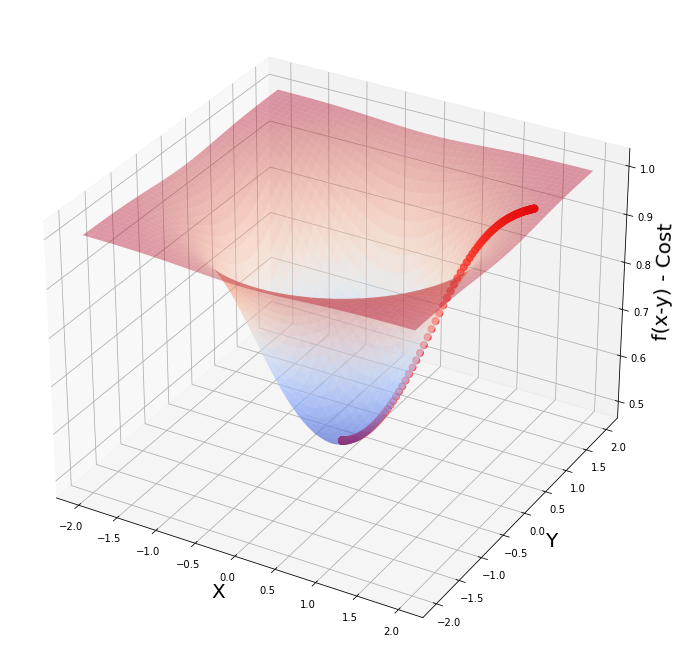

In [26]:
# Plotting these values on 3D gradient
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = '3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x-y) - Cost', fontsize=20)

ax.plot_surface(x_3,y_3,f(x_3,y_3),cmap = cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0],values_array[:, 1], f(values_array[:, 0],values_array[:, 1]), s=50, color = 'red')
plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [27]:
# Make sample data
x_4 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_4 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_4 array:', x_4.shape)
print('Shape of y_4 array:', y_4.shape)

Shape of x_4 array: (7, 1)
Shape of y_4 array: (7, 1)


In [28]:
# Linear Regression
regr = LinearRegression()
regr.fit(x_4,y_4)
print('Theta 0: ',regr.intercept_[0])
print('Theta 1: ',regr.coef_[0][0])

Theta 0:  0.8475351486029545
Theta 1:  1.2227264637835913


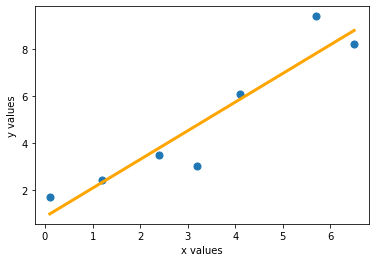

In [29]:
plt.scatter(x_4, y_4, s=50)
plt.plot(x_4, regr.predict(x_4), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [30]:
# y_hat = theta_0 +theta_1 * x
y_hat =  0.8475351486029545 + 1.2227264637835913 * x_4
print('Est values of y_hat are:\n', y_hat)
print('Actual y values are:\n', y_4)

Est values of y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual y values are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [31]:
# Mean square error function
def mse(y, y_hat):
    #mse_calc = 1/y.size * sum((y-y_hat)**2)
    mse_calc = np.average((y-y_hat)**2, axis = 0) 
    return mse_calc

In [32]:
print('Manually calculated mean square error: ',mse(y_4, y_hat))
print('MSE regression using Manual Calc is : ',mean_squared_error(y_4, y_hat))
print('MSE regression is : ',mean_squared_error(y_4, regr.predict(x_4)))

Manually calculated mean square error:  [0.94796558]
MSE regression using Manual Calc is :  0.9479655759794577
MSE regression is :  0.9479655759794577


## 3D plot for MSE Cost Function
### Make data for thetas

In [33]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop = 3, num = nr_thetas)
th_1 = np.linspace(start = -1, stop = 3, num = nr_thetas)
plot_t0,plot_t1 = np.meshgrid(th_0, th_1)

### Calc of MSE using nested loop

In [34]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_4
        plot_cost[i][j] = mse(y_4,y_hat)

print('Shape of plot_t0: ', plot_t0.shape)
print('Shape of plot_t1: ', plot_t1.shape)
print('Shape of plot_cost: ', plot_cost.shape)

Shape of plot_t0:  (200, 200)
Shape of plot_t1:  (200, 200)
Shape of plot_cost:  (200, 200)


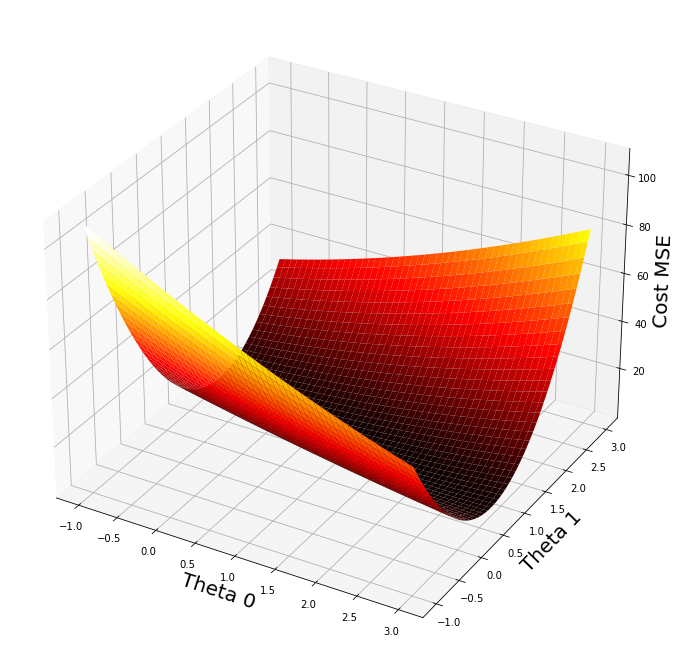

In [35]:
# Plotting MSE
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0' , fontsize = 20)
ax.set_ylabel('Theta 1' , fontsize = 20)
ax.set_zlabel('Cost MSE' , fontsize = 20)

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap = cm.hot)

plt.show()

In [36]:
print('Min value of plot cost: ', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), dims = plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91] ', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91] ', plot_t1[111][91])

Min value of plot cost:  0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]  0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]  1.2311557788944723


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [37]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [40]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_4, thetas[0] + thetas[1] * x_4)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_4, y_4, thetas)
    
    #Append new values to our arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_4, thetas[0] + thetas[1]*x_4))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is :', mse(y_4, thetas[0] + thetas[1] * x_4))    

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is : [0.94797511]


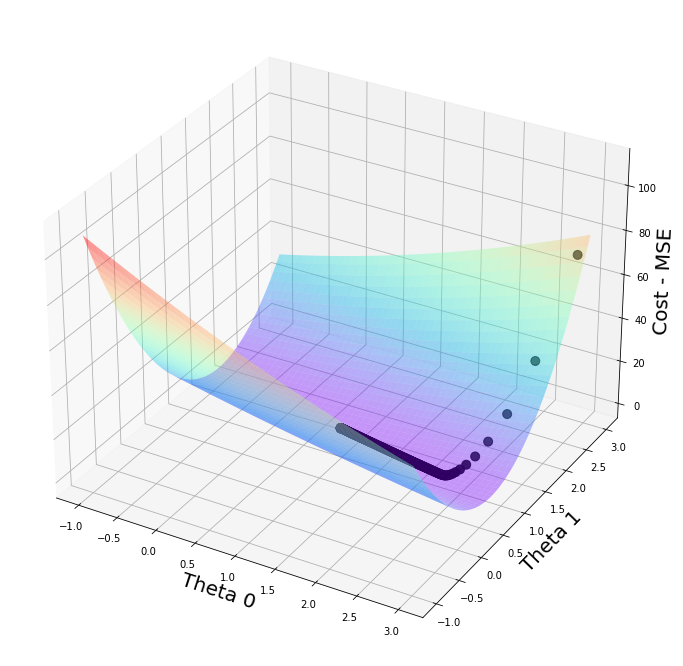

In [42]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals, s=80 , color='black')
ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap = cm.rainbow, alpha=0.4)
plt.show()